In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns



from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils import to_categorical 
from keras.models import Sequential
from keras.metrics import Recall,Precision
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop , Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
train_df=pd.read_csv(r'/kaggle/input/digit-recognizer/train.csv')
train_df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_df.shape

(42000, 785)

In [5]:
x=train_df.drop('label',axis=1)
y=train_df['label']

In [6]:
x.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [7]:
test_df=pd.read_csv(r'/kaggle/input/digit-recognizer/test.csv')
test_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
x=x/255
test_df=test_df/255

In [9]:
x=x.values.reshape(-1,28,28,1)
test_df=test_df.values.reshape(-1,28,28,1)

In [10]:
x.shape

(42000, 28, 28, 1)

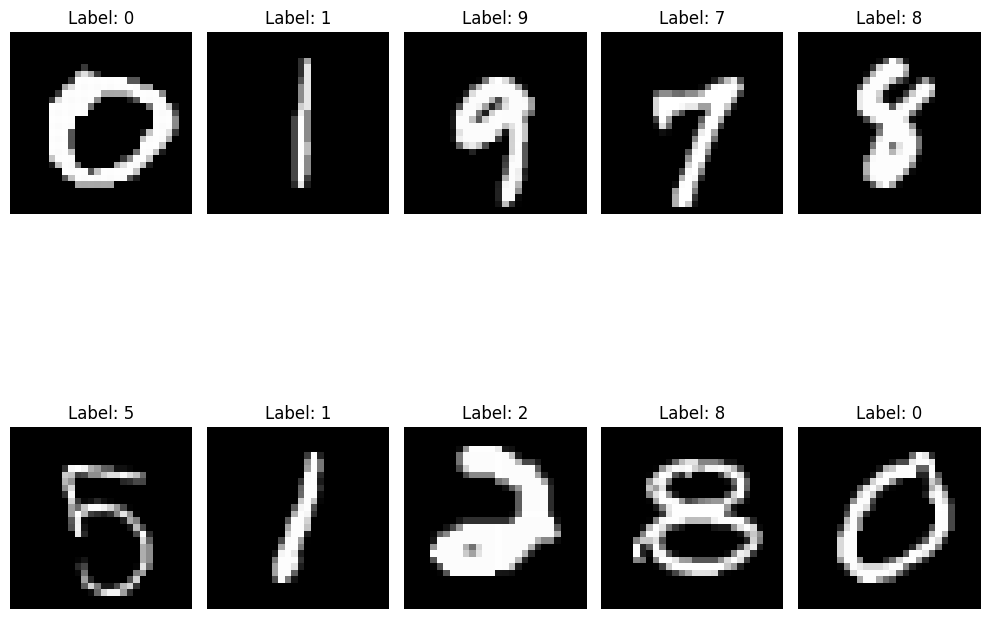

In [11]:
num_images = 15  # Number of images to display
indices = np.random.choice(train_df.shape[0], num_images, replace=False)
images = x[indices]
labels = y[indices]

# Create a grid of images
fig, axes = plt.subplots(2, 5, figsize=(10, 10))
for ax, img, label in zip(axes.flatten(), images, labels):
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')  # Hide the axes

plt.tight_layout()
plt.show()


In [12]:
y=to_categorical(y,num_classes=10)

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
model=Sequential()
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,(5,5),activation='relu'))

model.add(MaxPool2D((2,2)))

model.add(Dropout(0.5))

model.add(Conv2D(65,(3,3),activation='relu'))
model.add(Conv2D(65,(3,3),activation='relu'))

model.add(MaxPool2D((2,2)))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10,activation='softmax'))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(
               optimizer=Adam(),
               loss='categorical_crossentropy',
               metrics=[
                  'accuracy',
                  Recall(name='Recall'),
                  Precision(name='Precision')
                  ]
                  )
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 20, 20, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 65)       │        18,785 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 65)       │        38,090 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 65)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 3, 3, 65)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 585)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        75,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,637 (623.58 KB)

 Trainable params: 159,637 (623.58 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))  

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - Precision: 0.9862 - Recall: 0.9827 - accuracy: 0.9838 - loss: 0.0562 - val_Precision: 0.9937 - val_Recall: 0.9915 - val_accuracy: 0.9923 - val_loss: 0.0253
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Precision: 0.9863 - Recall: 0.9830 - accuracy: 0.9844 - loss: 0.0514 - val_Precision: 0.9918 - val_Recall: 0.9906 - val_accuracy: 0.9912 - val_loss: 0.0317
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Precision: 0.9863 - Recall: 0.9829 - accuracy: 0.9846 - loss: 0.0537 - val_Precision: 0.9927 - val_Recall: 0.9910 - val_accuracy: 0.9923 - val_loss: 0.0249
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Precision: 0.9862 - Recall: 0.9835 - accuracy: 0.9848 - loss: 0.0525 - val_Precision: 0.9940 - val_Recall: 0.9910 - val_accuracy: 0.9924 - val_loss: 0.0226
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Precision: 0.9880 - Recall: 0.9848 - accuracy: 0.9861 - loss: 0.0499 - val_Precision: 0.9923 - v

In [19]:
model.save('Handwritettn_model.keras')

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


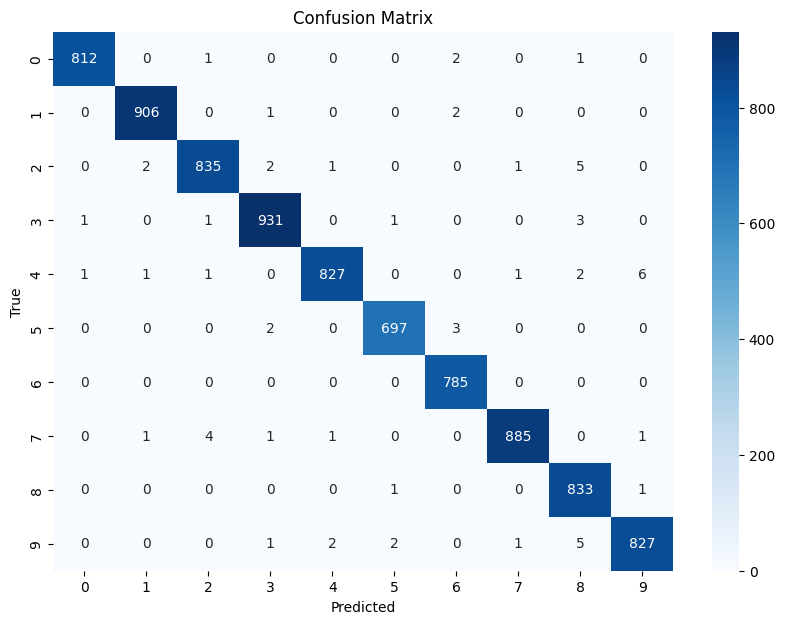

In [21]:
import numpy as np

y_pred_prob = model.predict(x_test)

y_pred_classes = np.argmax(y_pred_prob, axis=1)

y_test_classes = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_classes, y_pred_classes)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [30]:
def predict_image_show(image):
  org_image = image
  single_image = np.expand_dims(org_image, axis=0)
  predictions = model.predict(single_image)
  predict_class=np.argmax(predictions,axis=1)
  plt.imshow(image ,cmap='gray')
  plt.title(f'Predicted Class: {predict_class[0]}')
  plt.axis('off')
  plt.show()
 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


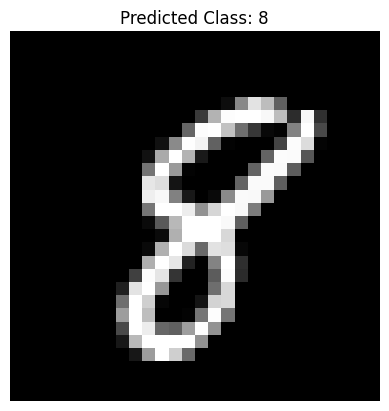

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


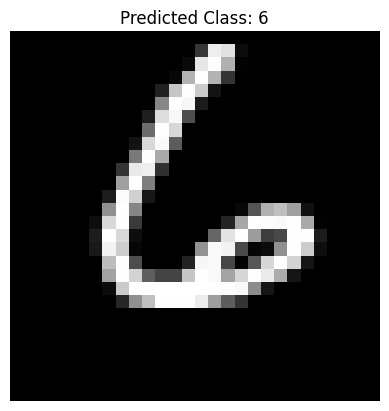

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


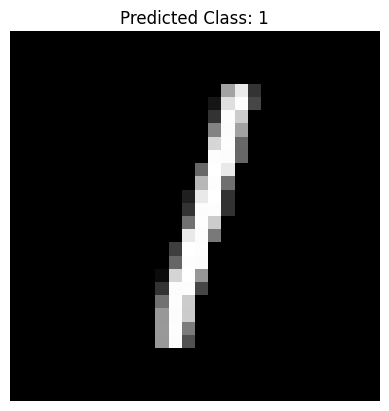

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


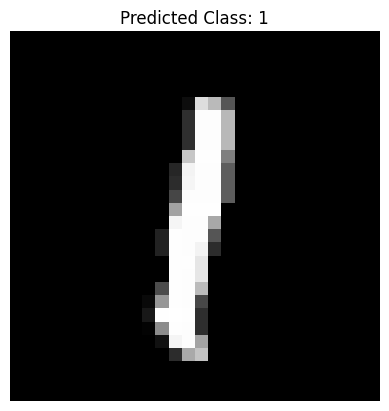

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


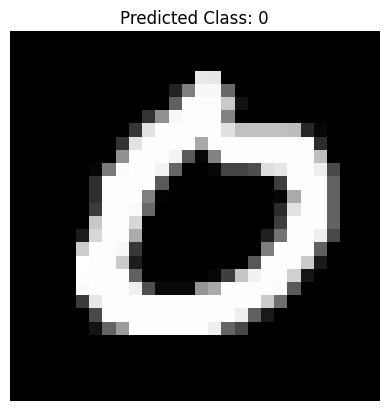

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


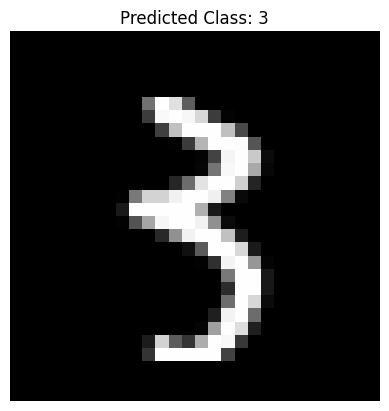

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


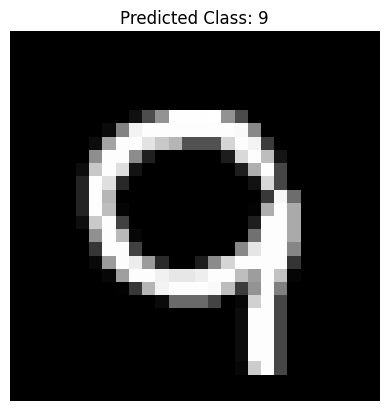

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


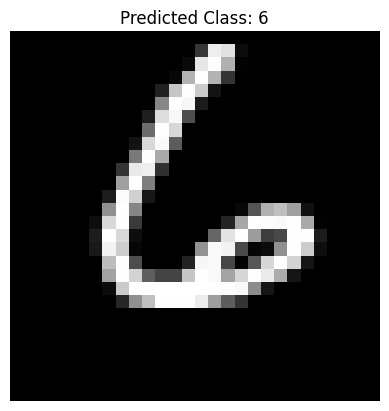

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


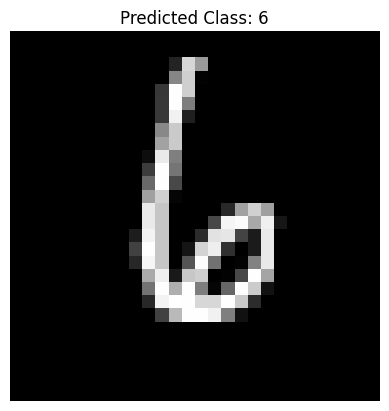

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


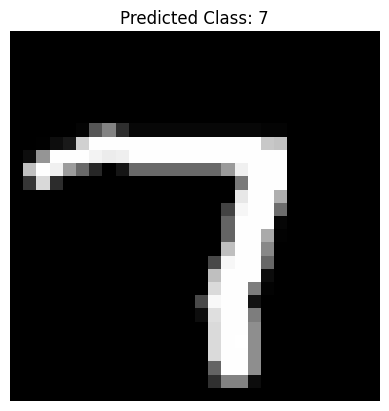

In [37]:
for i in range (10):
    from random import randint

    n=randint(1,50)
    
    predict_image_show(x_test[n])